# Movement detection

# Libraries and files

In [26]:
#import libraries and files
import pandas as pd
import operator
import cv2
import csv
import math
import matplotlib.pyplot as plt  # standard Python plotting library
import numpy as np  # package for scientific computing, handles arrays and math
import matplotlib.gridspec as gs
from scipy.optimize import curve_fit
import seaborn as sns
from tdt import read_block

tpath = 9 #total experiments

#photometry path and file
FOLDER_PATH = '/home/li/Documents/Template_matching/Photometry/'

FOLDER_NAME = [0 for i in range(tpath)]
FOLDER_NAME[0] = '159459-R-221006-091824'
FOLDER_NAME[1] = '159459-L-221020-102241'
FOLDER_NAME[2] = '159459-BL-221018-091752'
FOLDER_NAME[3] = '151653-R-221005-112408'
FOLDER_NAME[4] = '151653-L-221019-114353'
FOLDER_NAME[5] = '151653-RR-221012-102704'
FOLDER_NAME[6] = '151652-L-221011-091017'
FOLDER_NAME[7] = '151652-RR-221018-121215'
FOLDER_NAME[8] = '151653-LL-221101-100649'


print("FOLDER_NAME: ", FOLDER_NAME)
BLOCK_PATH = [0 for i in range(tpath)]
BLOCK_PATH[0] = FOLDER_PATH + FOLDER_NAME[0]
BLOCK_PATH[1] = FOLDER_PATH + FOLDER_NAME[1]
BLOCK_PATH[2] = FOLDER_PATH + FOLDER_NAME[2]
BLOCK_PATH[3] = FOLDER_PATH + FOLDER_NAME[3]
BLOCK_PATH[4] = FOLDER_PATH + FOLDER_NAME[4]
BLOCK_PATH[5] = FOLDER_PATH + FOLDER_NAME[5]
BLOCK_PATH[6] = FOLDER_PATH + FOLDER_NAME[6]
BLOCK_PATH[7] = FOLDER_PATH + FOLDER_NAME[7]
BLOCK_PATH[8] = FOLDER_PATH + FOLDER_NAME[8]


#Path to videos
VIDEO_PATH = [0 for i in range(tpath)]
VIDEO_PATH[0] = BLOCK_PATH[0]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-R-221006-091824_Cam1.avi'
VIDEO_PATH[1] = BLOCK_PATH[1]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-L-221020-102241_Cam1.avi'
VIDEO_PATH[2] = BLOCK_PATH[2]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-BL-221018-091752_Cam1.avi'
VIDEO_PATH[3] = BLOCK_PATH[3]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-R-221005-112408_Cam1.avi'
VIDEO_PATH[4] = BLOCK_PATH[4]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-L-221019-114353_Cam1.avi'
VIDEO_PATH[5] = BLOCK_PATH[5]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-RR-221012-102704_Cam1.avi'
VIDEO_PATH[6] = BLOCK_PATH[6]+'/'+'Li_photo_stim_1_camera_-220601-092827_151652-L-221011-091017_Cam1.avi'
VIDEO_PATH[7] = BLOCK_PATH[7]+'/'+'Li_photo_stim_1_camera_-220601-092827_151652-RR-221018-121215_Cam1.avi'
VIDEO_PATH[8] = BLOCK_PATH[8]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-LL-221101-100649_Cam1.avi'

#Behavior Deeplabcut file
BEHAVE_PATH = '/home/li/Documents/Template_matching/DLC/'
BEHAVE_NAME = [0 for i in range(tpath)]
BEHAVE_NAME[0] = 'Li_photo_stim_1_camera_-220601-092827_159459-R-221006-091824_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[1] = 'Li_photo_stim_1_camera_-220601-092827_159459-L-221020-102241_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[2] = 'Li_photo_stim_1_camera_-220601-092827_159459-BL-221018-091752_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[3] = 'Li_photo_stim_1_camera_-220601-092827_151653-R-221005-112408_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[4] = 'Li_photo_stim_1_camera_-220601-092827_151653-L-221019-114353_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[5] = 'Li_photo_stim_1_camera_-220601-092827_151653-RR-221012-102704_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[6] = 'Li_photo_stim_1_camera_-220601-092827_151652-L-221011-091017_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[7] = 'Li_photo_stim_1_camera_-220601-092827_151652-RR-221018-121215_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[8] = 'Li_photo_stim_1_camera_-220601-092827_151653-LL-221101-100649_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'

print("\033[1m", tpath, " Experiments: "+"\033[0m")
for i in range(tpath):
    print(i+1,".", FOLDER_NAME[i])
print("Done")

FOLDER_NAME:  ['159459-R-221006-091824', '159459-L-221020-102241', '159459-BL-221018-091752', '151653-R-221005-112408', '151653-L-221019-114353', '151653-RR-221012-102704', '151652-L-221011-091017', '151652-RR-221018-121215', '151653-LL-221101-100649']
 9  Experiments: 
1 . 159459-R-221006-091824
2 . 159459-L-221020-102241
3 . 159459-BL-221018-091752
4 . 151653-R-221005-112408
5 . 151653-L-221019-114353
6 . 151653-RR-221012-102704
7 . 151652-L-221011-091017
8 . 151652-RR-221018-121215
9 . 151653-LL-221101-100649
Done


# Collect behavioral data

In [27]:
#Selected mouse for analysis
k=1

#Behavior video import
print("\033[1m"+"Collecting video information"+"\033[0m")
#Video information
cap = cv2.VideoCapture(VIDEO_PATH[k])
fwidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fheight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frate = cap.get(cv2.CAP_PROP_FPS)
tframes = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print("Image: ", fwidth, " x ", fheight, " at ",frate, "frames/s x ", tframes, " frames")
cap.release()
cv2.destroyAllWindows()
print("Done.")

#Collect pose coordinates from Deeplabcut csv file
print("\033[1m"+"Importing pose coordinates..."+"\033[0m")
#initialize lists
behave_time=[]
nose_xcoord=[]
nose_ycoord=[]
leftEar_xcoord=[]
leftEar_ycoord=[]
rightEar_xcoord=[]
rightEar_ycoord=[]
tailBase_xcoord=[]
tailBase_ycoord=[]
with open(BEHAVE_PATH+BEHAVE_NAME[k]) as behave_file:
    reader = csv.reader(behave_file)
    i=0       
    for row in reader:
        if i==1:
            print(row) #print coordinates headers
        if i>2:
            behave_time.append(np.round(int(row[0])/frate,2))
            nose_xcoord.append(np.round(float(row[1]),1))
            nose_ycoord.append(np.round(float(row[2]),1))
            leftEar_xcoord.append(np.round(float(row[4]),1))
            leftEar_ycoord.append(np.round(float(row[5]),1))
            rightEar_xcoord.append(np.round(float(row[7]),1))
            rightEar_ycoord.append(np.round(float(row[8]),1))
            tailBase_xcoord.append(np.round(float(row[10]),1))
            tailBase_ycoord.append(np.round(float(row[11]),1))
        #endif
        i=i+1
    #endfor
behave_file.close()
print("Done.")

#Calculate frame-by-frame coordinate displacement 
print("\033[1m"+"Calculating pixel displacement..."+"\033[0m")
#initialize variables
nose_dist = [0]
leftEar_dist = [0]
rightEar_dist = [0]
tailBase_dist = [0]
for i in range(len(behave_time)):
    if i>0:
        nose_dist.append(np.round(math.sqrt((nose_xcoord[i]-nose_xcoord[i-1])**2 + (nose_ycoord[i]-nose_ycoord[i-1])**2),2))
        leftEar_dist.append(np.round(math.sqrt((leftEar_xcoord[i]-leftEar_xcoord[i-1])**2 + (leftEar_ycoord[i]-leftEar_ycoord[i-1])**2),2))
        rightEar_dist.append(np.round(math.sqrt((rightEar_xcoord[i]-rightEar_xcoord[i-1])**2 + (rightEar_ycoord[i]-rightEar_ycoord[i-1])**2),2))
        tailBase_dist.append(np.round(math.sqrt((tailBase_xcoord[i]-tailBase_xcoord[i-1])**2 + (tailBase_ycoord[i]-tailBase_ycoord[i-1])**2),2))
    #endif
#end for i
print("Done.")


Image:  640  x  480  at  10.0 frames/s x  27520.0  frames
Done.
Importing pose coordinates...
['bodyparts', 'Nose', 'Nose', 'Nose', 'LeftEar', 'LeftEar', 'LeftEar', 'RightEar', 'RightEar', 'RightEar', 'TailBase', 'TailBase', 'TailBase']
Done.
Calculating pixel displacement...
Done.


# Movement transition detection

Behavioral transition event detection
total behave time:  2751.9
Collapsing behavioral events...
Done.


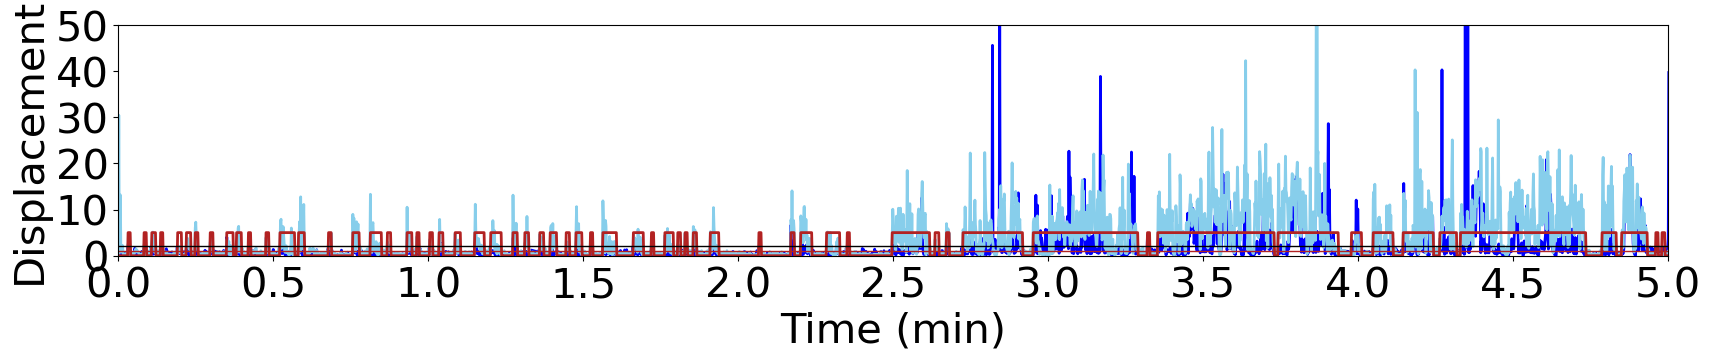

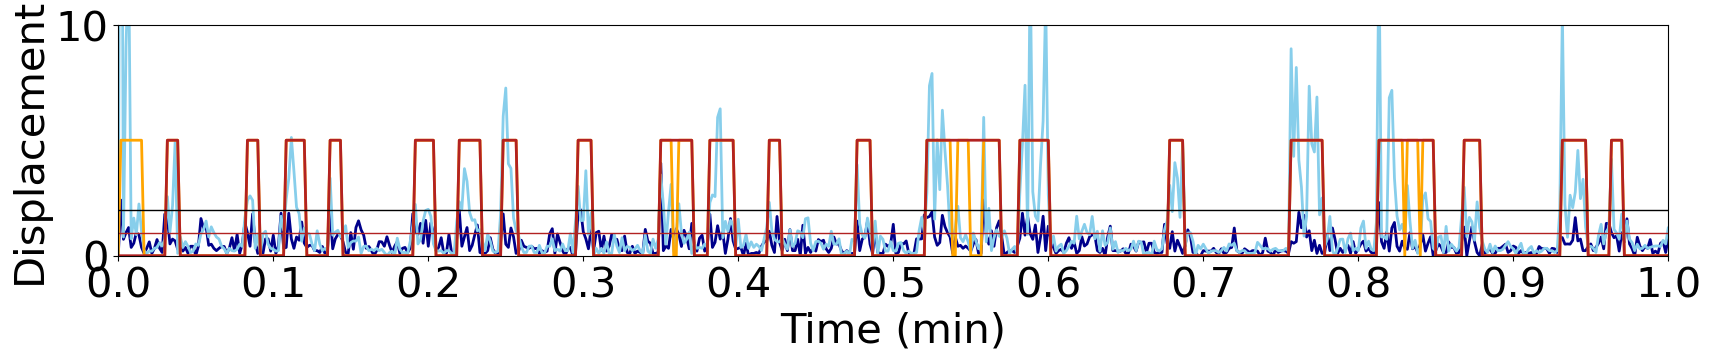

In [28]:
#Readjusting movement event detection threshold to increase sensitivity

#Detecting movement transitions is based on finding the movement events defined by 
#movement and arrest threshold (pixels) and time intervals (seconds)
move_interval = 0.5 #in second
arrest_interval = 0.5 #in second
move_threshold = 2 #pixel
arrest_threshold = 1 #pixel
bin_pos = 5
marker_dist = [nose_dist, tailBase_dist]
femerge = [27902,29400,27842,28500,28511,27855,27314,27371,27935] #RORR (return of righting reflex) end

behave_mean_marker1_array = []
behave_mean_marker2_array = []
behave_mean2_marker1_array = []
behave_mean2_marker2_array = []
event_times = []
event2_times = []

#Transition from arrest to movement
print("\033[1m"+"Behavioral transition event detection"+"\033[0m")
#User defined parameters
intervals=['pre','drug','ISO','emerge','post']
print("total behave time: ", behave_time[-1])
total_time = behave_time[-1]
interval_cutoff = [0,300]
pre_window_size = 5 # in second
post_window_size = 10 # in second


movement_bin = []
print("\033[1m"+"Collapsing behavioral events..."+"\033[0m")
count = 0
bin_up = 0
bin_down = 0
for i in range(int(total_time*frate)+1):
    if(marker_dist[0][i]>move_threshold or marker_dist[1][i]>move_threshold):
        count=count+1
        bin_up = 1
        movement_bin.append(bin_pos)
    else:
        if(bin_up==1):
            if(marker_dist[0][i]<arrest_threshold and marker_dist[1][i]<arrest_threshold and count>=move_interval*10):
                count=0
                bin_up=0
                movement_bin.append(0)
            else:
                count=count+1
                movement_bin.append(bin_pos)
             #endif
        else:
            count=0
            movement_bin.append(0)
        #endif
#endfor i

temp_movement = []
bin_up=0
for i in range(len(movement_bin)):
    if(i>arrest_threshold*10 and i<len(movement_bin)-arrest_threshold*10):
        if(movement_bin[i]>0):
            bin_up=1
            temp_movement.append(bin_pos)
        else:
            if(bin_up==1):
                if(max(movement_bin[i:i+1+int(arrest_interval*10)])>0):
                    temp_movement.append(bin_pos)
                else:
                    bin_up=0
                    temp_movement.append(0)
            else:
                temp_movement.append(0)
        #endif
    else:
        temp_movement.append(0)
    #endif
#endfor i

for i in range(len(temp_movement)):
    if(i<=interval_cutoff[0]*frate or i>=interval_cutoff[1]*frate):
        temp_movement[i] = 0
    #endif
#endfor i
print("Done.") 


#Visualize binary movement events 
#User defined plot parameters for zoomed out plot
plot_width_2 = 20
plot_height_2 = 3
xmin=0
xmax=5
xint=(xmax-xmin)/10
ymin_2=0
ymax_2=50
yint_2=10

behave_time_min = [x/60 for x in behave_time]
fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.plot(behave_time_min, marker_dist[1], color='blue',linewidth=2) #raw data from behavioral marker 1
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2) #raw data from behavioral marker 2
ax2.plot(behave_time_min, temp_movement, color='firebrick',linewidth=2) #binary movement analysis
ax2.axhline(move_threshold, color='black', linewidth=1)
ax2.axhline(arrest_threshold, color='firebrick', linewidth=1)
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
plt.show()

#User defined plot parameters for zoomed in plot
#Plot of all movement events
font_size=30
plot_width=20
plot_height=3
xmin=0
xmax=1
xint=(xmax-xmin)/10
ymin_2=0
ymax_2=10
yint_2=10

behave_time_min = [x/60 for x in behave_time]
fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax2.plot(behave_time_min, marker_dist[1], color='darkblue',linewidth=2) #raw movement data
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2) #raw movement data
ax2.plot(behave_time_min, movement_bin, color='orange',linewidth=2) #individual movement transitions
ax2.plot(behave_time_min, temp_movement, color='firebrick',linewidth=2) #coalesced movement transitions
ax2.axhline(move_threshold, color='black', linewidth=1)
ax2.axhline(arrest_threshold, color='firebrick', linewidth=1)
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
plt.show()


In [29]:
#Save data as numpy arrays
np.save("20241220_event_init.npy",event_times)
np.save("20241220_event_arrest.npy", event2_times)
np.save("20241220_behave_time.npy", behave_time)
np.save("20241220_dist_markers.npy", marker_dist)
np.save("20241220_movement_bin.npy", movement_bin)
np.save("20241220_all_movement_bin.npy", temp_movement)
print("saved")

saved
